<h1>Processing the PTB-XL Database for Multiclass Classification:</h1>

<a href='https://physionet.org/content/ptb-xl/1.0.3/'>Link To Database</a>

In [15]:
import wfdb
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast
import random

In [16]:
# Specifying path to database
path = "C:\\Users\\loera\\Documents\\Datasets\\PTB-XL\\Version-1.0.3"

<h3>Loading the PTB-XL Dataset:</h3>

In [17]:
def load_ptbxl(path: str) -> tuple:
    '''
    Loads the PTB-XL database from a CSV file and stores it into a DataFrame. Returns the database and the scp statments.
    
    Args:
        path: The file path of the CSV database
        
    Returns:
        tuple: A two-elements tuple containing the PTB-XL database and the corresponding SCP statements
    '''
    # Specifying path
    ptbxl_path = path
    
    # Loading databse metadata into a DataFrame
    ptbxl_database = pd.read_csv(os.path.join(ptbxl_path, 'ptbxl_database.csv'), index_col='ecg_id')
    
    # Loading the standard communication protocool statements
    scp_statements = pd.read_csv(os.path.join(ptbxl_path, 'scp_statements.csv'), index_col=0)
    
    return ptbxl_database, scp_statements

In [18]:
ptbxl_database, scp_statements = load_ptbxl(path)

In [19]:
ptbxl_database

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [20]:
scp_statements

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


<h3>Extracting only Necessary Metadata:</h3>

In [21]:
ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'scp_codes', 'filename_hr']]

In [22]:
ptbxl_database

,patient_id,age,sex,height,weight,site,device,scp_codes,filename_hr
ecg_id,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,0.0,CS-12 E,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,0.0,CS-12 E,"{'NORM': 80.0, 'SBRAD': 0.0}",records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,0.0,CS-12 E,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,0.0,CS-12 E,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,0.0,CS-12 E,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,2.0,AT-60 3,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,2.0,AT-60 3,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,2.0,AT-60 3,"{'ISCAS': 50.0, 'SR': 0.0}",records500/21000/21835_hr


<h3>Mapping SCP Code's to their Superclasses:</h3>

In [23]:
def compile_superclasses(scp_statements: pd.DataFrame) -> dict:
    '''
    Returns a dictionary that maps a diagnoses back to its superclass according the the scp statements provided.
    
    Args:
        scp_statements: The SCP statements corresponding to the PTB-XL database
        
    Returns:
        dict: A dictionary mapping SCP codes back to their superclasses
    '''
    scp_superclasses = {}
    
    for code in scp_statements.index:
        scp_superclasses[code] = scp_statements.loc[code, 'diagnostic_class']
    
    return scp_superclasses

In [24]:
superclasses = compile_superclasses(scp_statements)
print(superclasses)

{'NDT': 'STTC', 'NST_': 'STTC', 'DIG': 'STTC', 'LNGQT': 'STTC', 'NORM': 'NORM', 'IMI': 'MI', 'ASMI': 'MI', 'LVH': 'HYP', 'LAFB': 'CD', 'ISC_': 'STTC', 'IRBBB': 'CD', '1AVB': 'CD', 'IVCD': 'CD', 'ISCAL': 'STTC', 'CRBBB': 'CD', 'CLBBB': 'CD', 'ILMI': 'MI', 'LAO/LAE': 'HYP', 'AMI': 'MI', 'ALMI': 'MI', 'ISCIN': 'STTC', 'INJAS': 'MI', 'LMI': 'MI', 'ISCIL': 'STTC', 'LPFB': 'CD', 'ISCAS': 'STTC', 'INJAL': 'MI', 'ISCLA': 'STTC', 'RVH': 'HYP', 'ANEUR': 'STTC', 'RAO/RAE': 'HYP', 'EL': 'STTC', 'WPW': 'CD', 'ILBBB': 'CD', 'IPLMI': 'MI', 'ISCAN': 'STTC', 'IPMI': 'MI', 'SEHYP': 'HYP', 'INJIN': 'MI', 'INJLA': 'MI', 'PMI': 'MI', '3AVB': 'CD', 'INJIL': 'MI', '2AVB': 'CD', 'ABQRS': nan, 'PVC': nan, 'STD_': nan, 'VCLVH': nan, 'QWAVE': nan, 'LOWT': nan, 'NT_': nan, 'PAC': nan, 'LPR': nan, 'INVT': nan, 'LVOLT': nan, 'HVOLT': nan, 'TAB_': nan, 'STE_': nan, 'PRC(S)': nan, 'SR': nan, 'AFIB': nan, 'STACH': nan, 'SARRH': nan, 'SBRAD': nan, 'PACE': nan, 'SVARR': nan, 'BIGU': nan, 'AFLT': nan, 'SVTAC': nan, 'PSVT

<h3>Removing Records with no Superclasses:</h3>

In [25]:
def get_superclass_records(ptbxl_database: pd.DataFrame, superclasses: dict) -> pd.DataFrame:
    '''
    Filters out any records without superclasses (i.e, CD, HYP, MI, NORM, STTC).
    
    Args:
        ptbxl_database: A DataFrame containing the PTB-XL database
        superclasses: A dictionary containing all superclass mappings of each SCP code/label
        
    Return:
        DataFrame: A DataFrame containing only records that have a corresponding superclass
    '''
    # Getting all SCP codes 
    scp_codes = ptbxl_database.loc[:, ['scp_codes']]
    
    # Converting SPC codes to literal dictionaries
    scp_codes['scp_codes'] = scp_codes['scp_codes'].apply(ast.literal_eval)
    
    for record in scp_codes.index:
        
        # Retrieving SCP codes corresponding to current record
        record_scp_codes = scp_codes.at[record, 'scp_codes']
        
        # Empties the codes for the current record
        scp_codes.at[record, 'scp_codes'] = {}
        
        new_scp_codes = {}
        
        for code, confidence in record_scp_codes.items():
            
            if code in superclasses.keys():
                
                # Retrieves the corresponding superclass
                superclass_code = superclasses[code]
                
                # Moves to next code if current code doesn't have a corresponding superclass
                if pd.isna(superclass_code):
                    continue
                
                # Assigns highest confidence rating between duplicate superclass mappings
                elif superclass_code in new_scp_codes.keys():
                    if confidence > new_scp_codes[superclass_code]:
                        new_scp_codes[superclass_code] = confidence
            
                # Adds computed superclass to new dictionary with identical confidence score
                else:
                    new_scp_codes[superclass_code] = confidence
        
        # Sorts new codes alphabetically
        sorted_scp_codes = dict(sorted(new_scp_codes.items()))
        
        # Assigns new codes to the current record/index
        scp_codes.at[record, 'scp_codes'] = sorted_scp_codes
    
    # Assigns new superclass codes to entire database
    ptbxl_database['scp_codes'] = scp_codes
        
    # Removes records with no superclasses via boolean mask
    has_superclass = np.array([len(code) > 0 for code in scp_codes['scp_codes']])
    ptbxl_database = ptbxl_database[has_superclass]
    
    print(f'Found {len(ptbxl_database)} records with superclasses.')
    print(f'Removed {len(scp_codes) - len(ptbxl_database)} records without superclasses.\n')
    
    return ptbxl_database

In [26]:
ptbxl_database = get_superclass_records(ptbxl_database, superclasses)
ptbxl_database

Found 21388 records with superclasses.
Removed 411 records without superclasses.



,patient_id,age,sex,height,weight,site,device,scp_codes,filename_hr
ecg_id,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,0.0,CS-12 E,{'NORM': 100.0},records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,0.0,CS-12 E,{'NORM': 80.0},records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,0.0,CS-12 E,{'NORM': 100.0},records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,0.0,CS-12 E,{'NORM': 100.0},records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,0.0,CS-12 E,{'NORM': 100.0},records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,2.0,AT-60 3,{'STTC': 100.0},records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,2.0,AT-60 3,{'NORM': 100.0},records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,2.0,AT-60 3,{'STTC': 50.0},records500/21000/21835_hr


<h3>Retrieving Highest-Confidence Superclass Label:</h3>

In [27]:
def get_best_superclass(record_superclasses: dict) -> str:
    '''
    Returns the superclass label of a single record with the highest confidence score. If two or more classes
    share the same confidence score, one is chosen at random.
    
    Args:
        record_superclasses: A dictionary containing the superclasses of a single record (i.e., {superclass_label:confidence_score})
        
    Returns:
        str: The superclass label with the highest confidence score
    '''
    # Unpacks the dictionary's singular key
    if len(record_superclasses) == 1:
        best_superclass = [*record_superclasses.keys()][0]
        return best_superclass
    
    # Finds the highest confidence value
    highest_confidence = max(record_superclasses.values())
    
    # Removes superclasses with lower confidence values
    best_superclasses = [sc for (sc, confidence) in record_superclasses.items() if confidence == highest_confidence]
    
    # Pops off a superclass at random if they share identical confidence value
    if len(best_superclasses) > 1:
        print('Two superclasses with identical confidence found.')
        best_superclass = str(random.choice(best_superclasses))
        print(f'Class {best_superclass} chosen.')
        return best_superclass
    
    else:
        best_superclass = best_superclasses[0]
        return best_superclass

<h3>Loading and Processing an Indiviudal Record's Signals:</h3>

In [28]:
def get_record_signals(path: str, ptbxl_database: pd.DataFrame, ecg_id: int) -> tuple[np.ndarray, dict]: 
    '''
    Returns the specified record's ECG signals and fields from the specified database and file path.
    
    Args:
        path: The file path where the PTB-XL database is located
        ptbxl_database: The physical PTB-XL database
        ecg_id: The record who's signals are being retrieved
        
    Returns:
        tuple: A two-dimensional tuple consisting of the record's signals stored in an numpy array and 
        the record's fields within a dictionary
    '''
    # Get the record filename
    record_filename_hr = ptbxl_database.loc[ecg_id, 'filename_hr']
        
    # Construct the full path to the record file
    record_path = os.path.join(path, record_filename_hr)
        
    # Read the ECG data using wfdb.rdsamp
    record = wfdb.rdsamp(record_path)
        
    # Extracts the signals and fields
    signals = record[0]
    fields = record[1]
    
    return (signals, fields)

In [29]:
ecg_id = 20189
signals, fields = get_record_signals(path, ptbxl_database, ecg_id)

In [30]:
print(signals.shape)

(5000, 12)


In [31]:
print(fields)

{'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


In [32]:
def get_single_lead_signal(record_signals: np.ndarray, lead_signal:int) -> np.ndarray:
    '''
    Returns only the lead signal specified.
    
    Args:
        record_signals: A matrix containing all the lead signals of a single record: (n_time_points, n_signals)
        lead_signal: The specific lead signal to retrieve
        
    Returns:
        np.ndarray: A matrix containing only the specified lead signal: (n_time_points,)
    '''
    lead_idx = lead_signal - 1
    
    return record_signals[:, lead_idx]

In [33]:
signals = get_single_lead_signal(signals, 2)
print(signals.shape)

(5000,)


<h3>Ploting a Record's ECG Signals:</h3>

In [34]:
def plot_signal(ecg_id: int, signals: np.ndarray, fields: dict) -> None:
    '''
    Plots lead signal 2 for the corresponding record using the provided signals and fields.
    
    Args:
        ecg_id: The record to plot
        signals: A matrix consisting of the record's ECG signals
        fields: Data that determines the labels of the axes
        
    Returns:
        None:
    '''
    plt.figure(figsize=(12,6))
    plt.plot(signals, label=fields['sig_name'][1])
    plt.title(f"ECG Record {ecg_id}: Lead Signal 2")
    plt.xlabel("Time Points")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.show()

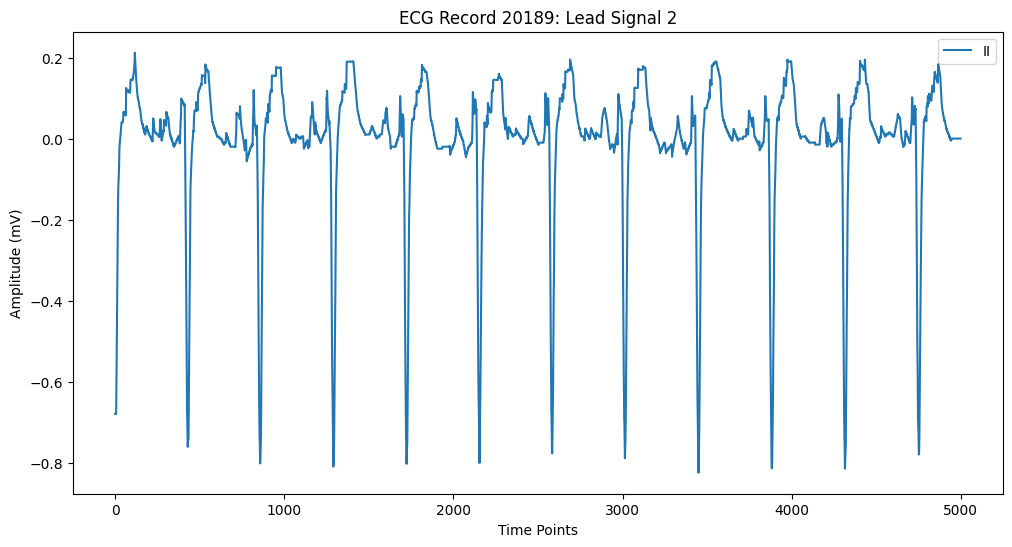

In [35]:
plot_signal(ecg_id, signals, fields)

<h3>Processing the Database for Multiclass Classification:</h3>

In [ ]:
def multiclass_processing(path: str, output_dir: str) -> None:
    '''
    Saves the PTB-XL database as a ".npz" file for multi-class classification.
    
    Args:
        path: The path where the PTB-XL database is located
        output_dir: The location where the compressed database will be saved
        
    Returns:
        None:
    '''
    # Loading database
    ptbxl_database, scp_statements = load_ptbxl(path)
    ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'scp_codes', 'filename_hr']]
    
    # Initializing superclass mapping
    superclasses = compile_superclasses(scp_statements)
    
    # Filtering out any records without superclasses
    ptbxl_database = get_superclass_records(ptbxl_database, superclasses)
    
    # Initializing arrays that will be stored in ".npz" file
    ecg_ids = np.array(ptbxl_database.index)
    signals = np.empty([*ecg_ids.shape, 5000], dtype=object)
    fields = np.empty([*ecg_ids.shape], dtype=dict)
    metadata = np.empty([*ecg_ids.shape, 7], dtype=list)
    superclasses = np.empty([*ecg_ids.shape], dtype='U4')
      
    for i, ecg_id in enumerate(ecg_ids):
        
        try:
            record_signals, record_fields = get_record_signals(path, ptbxl_database, ecg_id)
            record_signals = get_single_lead_signal(record_signals, 2)
            
            signals[i] = record_signals
            fields[i] = record_fields
            
            metadata[i] = ptbxl_database.loc[ecg_id, :'device']
            
            # Finding and returning the superclass code with the largest confidence
            record_superclasses = ptbxl_database.loc[ecg_id, 'scp_codes']
            record_superclass = get_best_superclass(record_superclasses)
            superclasses[i] = record_superclass
            
            print(f'Saved ECG Record {ecg_id} to {output_dir}.')
            
        except Exception as e:
            
            print(f'Error processing ECG Record {ecg_id}: {e}')
            return
            
    # Stores arrays into a compressed".npz" file
    np.savez_compressed(output_dir, ecg_ids=ecg_ids, signals=signals, fields=fields, metadata=metadata, superclasses=superclasses)

<h3>Storing the Processed Database as an ".npz" File:</h3>

In [ ]:
# Specifying output directory
output_dir = 'C:\\Users\\loera\\OneDrive\\Python Projects\\College\\ECG\\Processed Datasets\\MC_dataset'

In [ ]:
multiclass_processing(path, output_dir)

<h3>Loading the Stored Database into DataFrames:</h3>

In [36]:
def load_database(file_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Loads a compressed ".npz" database from the specified path. Two identically indexed DataFrames are returned.
    
    Args:
        file_path: The path containing the compressed ".npz" file
        
    Returns:
        tuple: A tuple consisting of two DataFrames, one containing the PTB-XL metadata and the second containing
        all corresponding ECG signals
    '''
    # Loading the compressed file
    database = np.load(file_path, allow_pickle=True)
    
    # Extracting all the data from the loaded file
    ecg_ids = database['ecg_ids']
    signals = database['signals']
    fields = database['fields']
    metadata = database['metadata']
    superclasses = database['superclasses']
    
    data = {}
    
    # Further breaking down the metadata
    col_names = ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device']
    for i, col in enumerate(col_names):
        data[col] = pd.Series(metadata[:, i], index=ecg_ids)
    
    # Casting data in fields to literal dictionaries
    fields = np.array([ast.literal_eval(str(field)) for field in fields])
    
    # Adding fields and superclasses to the data
    data['fields'] = fields
    data['superclasses'] = superclasses
    
    ptbxl_df = pd.DataFrame(data=data, index=ecg_ids)
    signals_df = pd.DataFrame(data=signals, index=ecg_ids, dtype=float)
    
    return ptbxl_df, signals_df

In [37]:
npz_path = 'C:\\Users\\loera\\OneDrive\\Python Projects\\College\\ECG\\Processed Datasets\\MC_dataset.npz'

In [38]:
ptbxl_df, signals_df = load_database(npz_path)

<h3>Plotting the Same Record From Before:</h3>

In [43]:
ecg_id = 20189
record_signals = signals_df.loc[ecg_id,:]
record_fields = ptbxl_df.loc[ecg_id,'fields']

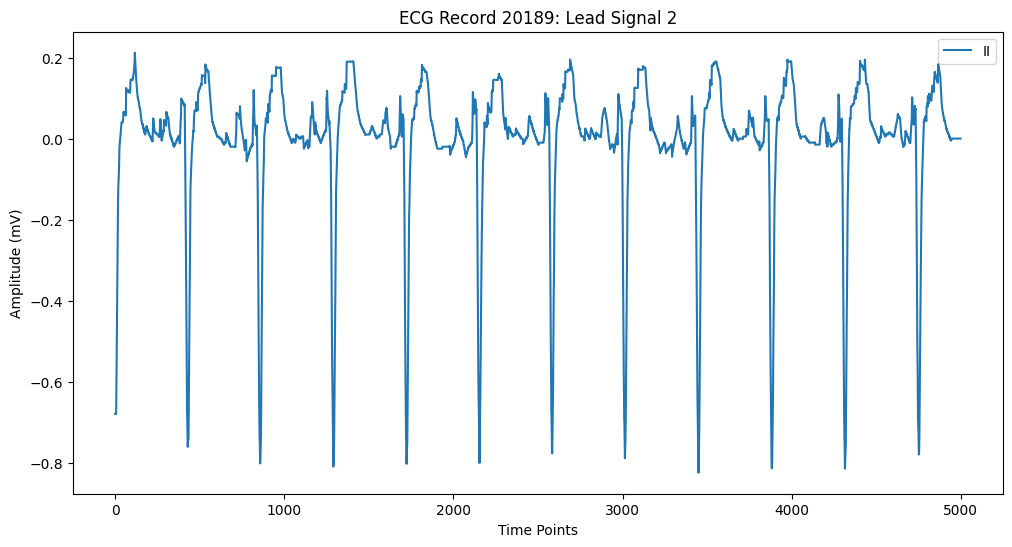

In [44]:
plot_signal(ecg_id, record_signals, record_fields)